In [3]:


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        
        # Create a matrix of shape (max_len, d_model) with all zeros
        pe = torch.zeros(max_len, d_model)
        
        # Create a tensor of shape (max_len, 1) containing the position indices
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        
        # Create a tensor of shape (1, d_model) containing the denominator values for sin and cos functions
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        
        # Compute the positional encodings and assign to the pe matrix
        pe[:, 0::2] = torch.sin(position * div_term)  # apply sin to even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # apply cos to odd indices
        
        # Add a batch dimension and register as buffer
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        # Add positional encoding to input tensor
        x = x + self.pe[:x.size(0), :]
        return x

# Example usage
d_model = 512  # dimension of the model
max_len = 100  # maximum length of the input sequences
pos_encoding = PositionalEncoding(d_model, max_len)

# Create a dummy input tensor of shape (sequence_length, batch_size, d_model)
dummy_input = torch.zeros(50, 32, d_model)

# Get the positional encoded input
encoded_input = pos_encoding(dummy_input)
print(encoded_input.shape)  # should be (50, 32, d_model)


torch.Size([50, 32, 512])


In [4]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import tensorflow as tf

def positional_encoding(position, d_model):
 
    # Create a matrix of shape [position, d_model] where each element is the position index
    angle_rads = np.arange(position)[:, np.newaxis] / np.power(10000, (2 * (np.arange(d_model)[np.newaxis, :] // 2)) / np.float32(d_model))
    
    # Apply sine to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    
    # Apply cosine to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

# Example use
position = 50  # Length of the sequence
d_model = 512  # Dimensionality of the model's output
pos_encoding = positional_encoding(position, d_model)

print(pos_encoding.shape)

(1, 50, 512)


ValueError: For X (2) and Y (2) with flat shading, A should have shape (1, 1, 3) or (1, 1, 4) or (1, 1) or (1,), not (1, 1, 1)

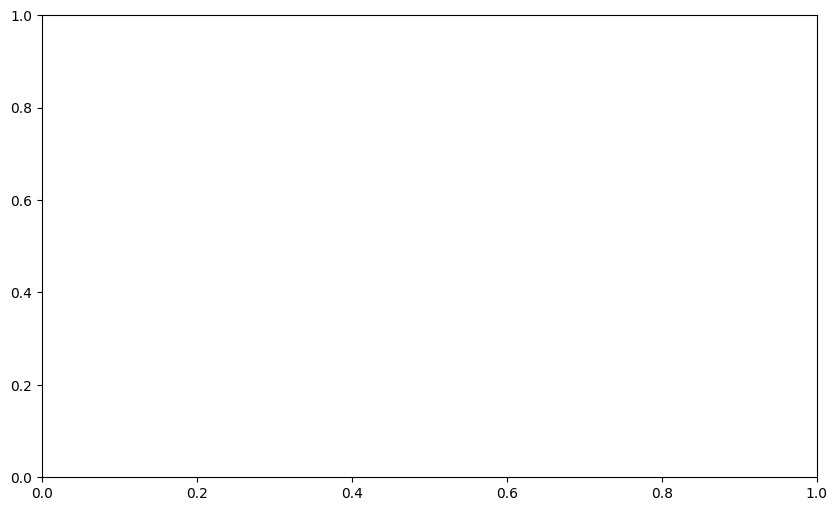

In [6]:
def plot_positional_encoding(pos_encoding, dim, seq_len=50):
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(pos_encoding[:seq_len, :dim], cmap='rainbow')
    plt.xlabel('Embedding Dimension')
    plt.ylabel('Sequence Position')
    plt.title(f'Positional Encoding (Dimensionality {dim})')
    plt.colorbar()
    plt.show()

# Define the parameters
max_seq_len = 100
dimensions = [1, 128, 512]

# Generate and plot positional encodings
for dim in dimensions:
    pos_encoding = positional_encoding(max_seq_len, dim)
    plot_positional_encoding(pos_encoding, dim)
